In [1]:
%load_ext autoreload
%autoreload 2

RAW   : 6757 datapoints from 2023-07-12 to 2023-08-31
SLICE : 1000 datapoints from 2023-08-24 to 2023-08-31


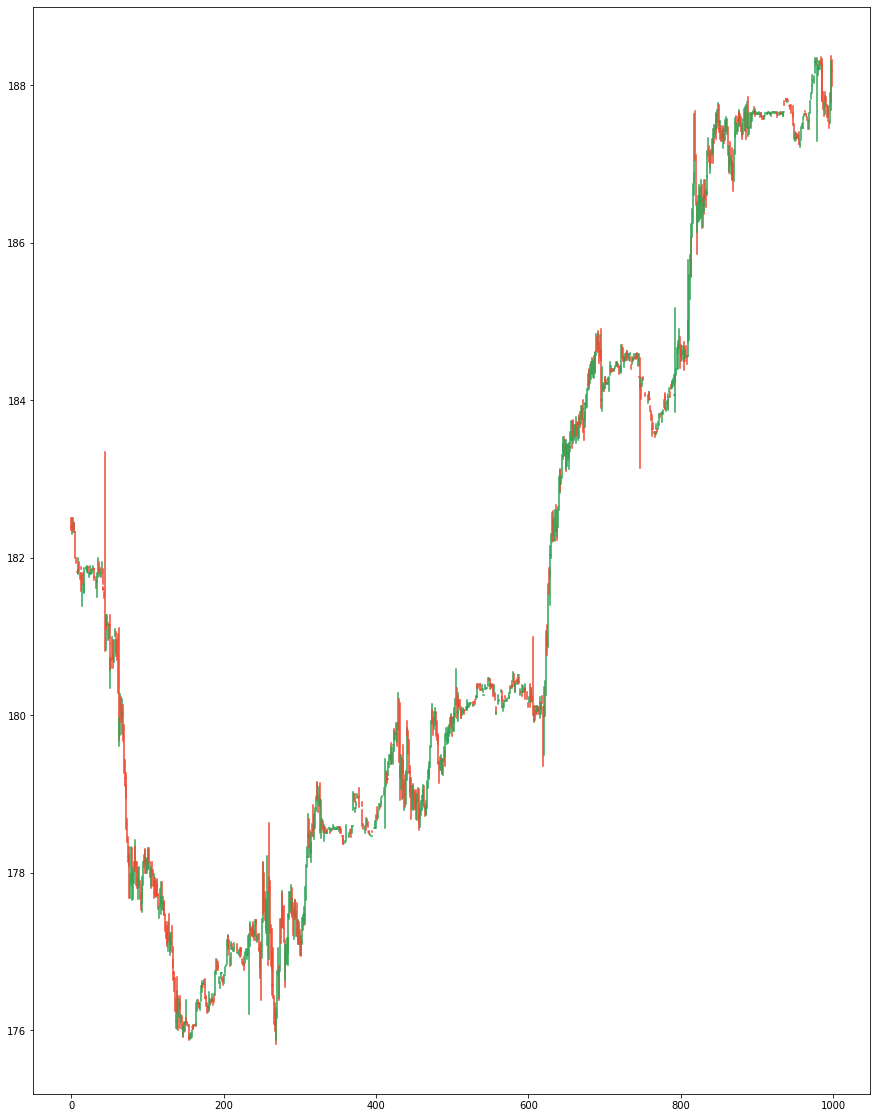

In [1]:
from priceanalytics.data import download_simple
from priceanalytics.plot import MultiPlot

import matplotlib.pyplot as plt
import numpy as np

df = download_simple('AAPL', past_days=50, interval=5)

print(f"RAW   : {len(df.index)} datapoints from {df.index[0][-1].date()} to {df.index[-1][-1].date()}")

df = df[-1000:] # Slice last 1000 datapoints

print(f"SLICE : {len(df.index)} datapoints from {df.index[0][-1].date()} to {df.index[-1][-1].date()}")

with MultiPlot(1) as m:
    m.ohlc(df)

In [2]:
from priceanalytics import indicators as I

# Add a wave trend indicator
df = I.add_wave_trend(df)

df = I.add_dfdt(df, "wt1", "wt1_ddt")
df = I.add_dfdt(df, "wt2", "wt2_ddt")

df = I.add_dfdt(df, "wt1_ddt", "wt1_ddt2")
df = I.add_dfdt(df, "wt2_ddt", "wt2_ddt2")

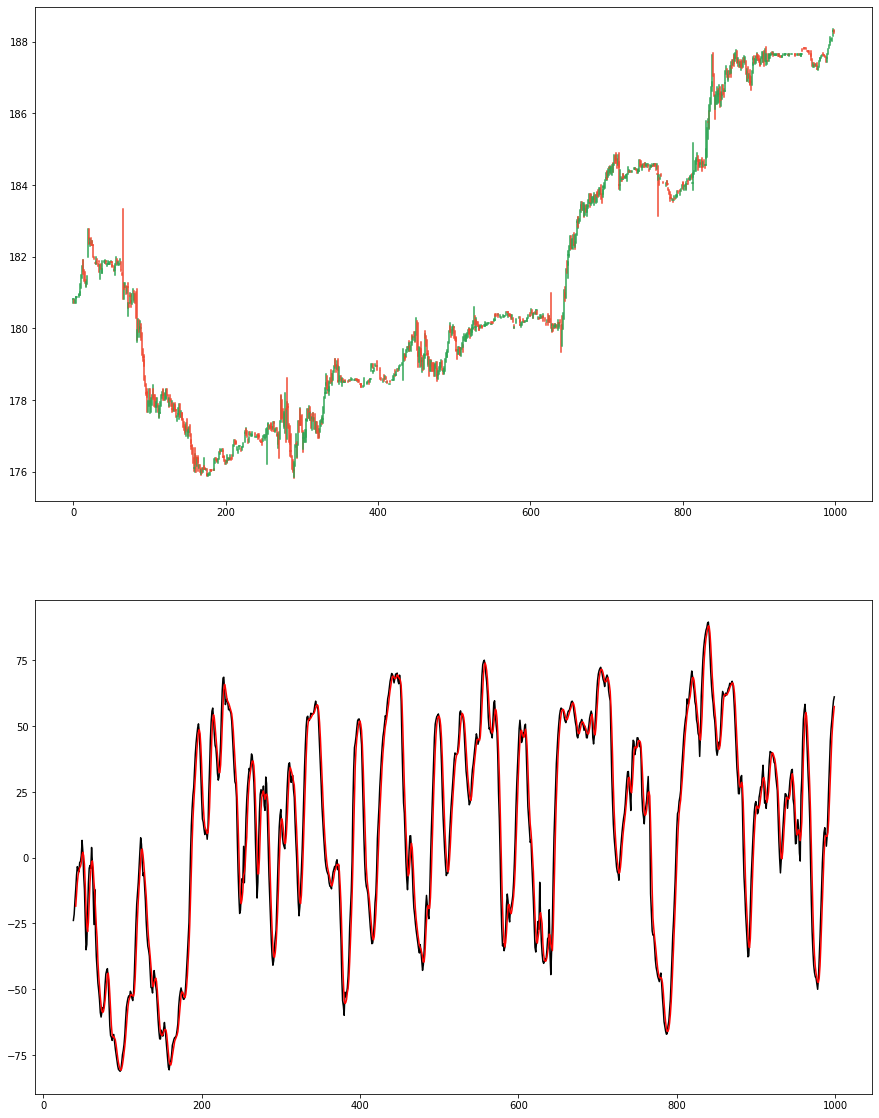

In [46]:
with MultiPlot(2) as m:
    m.ohlc(df)
    m.next()
    plt.plot(np.array(df['wt1']), color='#000000')
    plt.plot(np.array(df['wt2']), color='#FF0000')

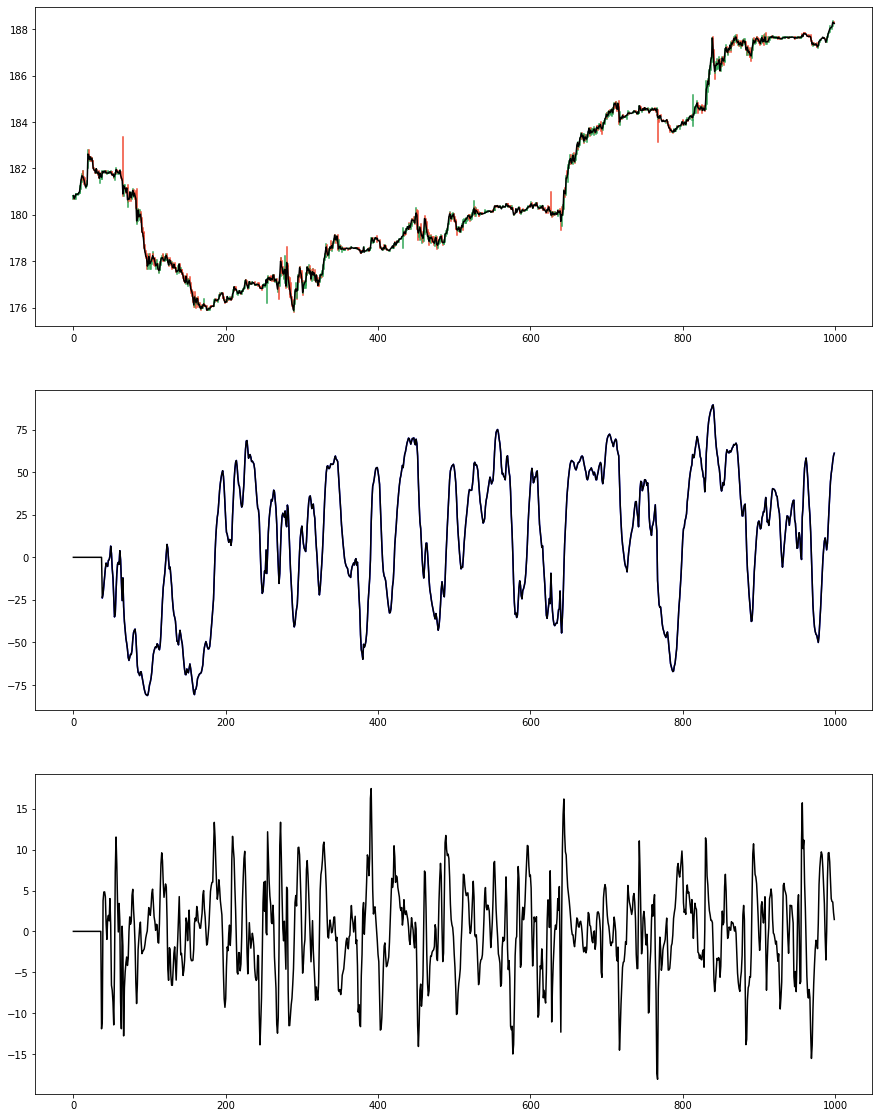

In [47]:

df = I.add_fft(df, "wt1", "wt1_fft")
df = I.add_fft(df, "close", "close_fft")

df = I.add_dfdt(df, "wt1_fft", "wt1_fft_ddt")

with MultiPlot(3) as m:
    m.ohlc(df)
    plt.plot(np.array(df['close_fft']), color='#000000')
    m.next()
    plt.plot(np.array(df['wt1']), color='b')
    plt.plot(np.array(df['wt1_fft']), color='#000000')
    
    m.next()
    plt.plot(np.array(df['wt1_fft_ddt']), color='#000000')
